# **Mission of Term Project Notebook**

You are a member of a bioinformatics team investigating the [effect of spaceflight on astronaut health](https://en.wikipedia.org/wiki/Effect_of_spaceflight_on_the_human_body).  Your team is trying to find the correlation between radiation and cognitive performace upon exposure of adverse conditions in space such as [microgravity](https://www.nasa.gov/centers-and-facilities/glenn/what-is-microgravity/) and [radiation](https://www.nasa.gov/directorates/esdmd/hhp/space-radiation/).  You just performed flow cytometry and have determined there is a noticeable separation between spaceflight and ground control samples on male test subjects, giving you confidence that there is a signal that machine learning could exploit.  You have also received the results of spacial learning performance including RAWM (Radiated Arm Water Maze), so you can now perform supervised learning algorithms with your data.

Your mission is to use supervised machine learning - [regression](https://en.wikipedia.org/wiki/Regression_analysis) - to determine if there is a a correlation between male astronaut samples and their ground control counterparts.  For if they do, then there is a chance that a supervised learning method can predict cognitive performance in response to radiation using different combinations and weights of Monocytes/Microglia activation from the flowcytometry.

In this notebook, you will use linear regression to predict the average block 1 errors (measured by RAWM assay) given its associated flowcytometry profile.

# Read in methods

**IMPORTANT**: Make sure you put a copy of the methods.ipynb in your google drive by following [these instructions](https://docs.google.com/document/d/1V9a3Z5YKT2Pbef4fgPAwB83bHX-p-rPBRRwo7w5Bi9k/edit?usp=sharing).

All the methods are stored in another notebook which you've already copied onto your Google drive.  You'll find it under "MyDrive/Colab Notebooks" and it's called "TermProject_Methods.ipynb".  We will now mount your Google drive and import the methods from that notebook.


In [1]:
# install the import_ipynb module which allows us to import notebooks into notebooks
!pip install import_ipynb
import import_ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00


In [2]:
# mount your Google drive to the "mnt/" mount point
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt")

Drive not mounted, so nothing to flush and unmount.
Mounted at mnt


In [3]:
# import the "Copy of methods.ipynb" notebook into this notebook
m = __import__("mnt/MyDrive/Colab Notebooks/TermProject_Methods")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 167.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 129.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 170.8 MB/s eta 0:00:00
  Created wheel for pybiomart: filename=pybiomart-0.1-py3-none-any.whl size=14600 sha256=ce55f004c068684a52075cbe2f5de1fae77f4eec1df70b6f7dae106c57fb733b
  Stored in directory: /tmp/pip-ephem-wheel-cache-_dfloddr/wheels/ad/45/4

# Read in data and metadata

In this section, we will define the data and metadata python dictionaries that will be used to store the OSDR experiment data.  

In [4]:
# define data and metadata dictionaries
data=dict()
metadata=dict()

In [5]:
# read in the metadata for each OSDR data set
metadata['479'] = m.read_meta_data('479')
metadata['776'] = m.read_meta_data('776')
metadata['777'] = m.read_meta_data('777')


In [6]:
# Use pandas to read in the RAWM assay
data['RAWM-479-normalized'] = m.read_behavior_data('479','LSDS-121_Radial_Arm_Water_Maze_Krukowski2021_RAWM_TRANSFORMED')
# print the
print('RAWM data shape: ', data['RAWM-479-normalized'].shape)
data['RAWM-479-normalized'].head(3)

RAWM data shape:  (356, 23)


,Sample Name,RAWM_D1_Trial1_Errors,RAWM_D1_Trial2_Errors,RAWM_D1_Trial3_Errors,RAWM_D1_Block1_Errors,RAWM_D1_Trial1_duration,RAWM_D1_Trial2_duration,RAWM_D1_Trial3_duration,RAWM_D1_Block1_duration,RAWM_D1_Trial1_velocity,...,RAWM_D2_Trial5_Errors,RAWM_D2_Trial6_Errors,RAWM_D2_MP_Errors,RAWM_D2_Trial4_duration,RAWM_D2_Trial5_duration,RAWM_D2_Trial6_duration,RAWM_D2_MP_duration,RAWM_D2_Trial4_velocity,RAWM_D2_Trial5_velocity,RAWM_D2_Trial6_velocity
0,2_RAWM_11months,7,9,9,8.333333333,51.685,59.0924,59.0924,56.62326667,18.6749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_RAWM_11months,3,2,5,3.333333333,21.7551,27.027,59.0924,35.95816667,18.3568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4_RAWM_11months,8,10,1,6.333333333,59.0924,59.0924,22.289,46.8246,19.9354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# read in the transformed results CSV file for LSDS-122 flow cytometry assay No.1 (Monocyte)
data['monocyte'] = m.read_flowcytometry_data('776', 'LSDS-122_Flow_Cytometry_Krukowski2021_Blood_Flow_TRANSFORMED')
print('monocyte shape: ', data['monocyte'].shape)
data['monocyte'].head(3)

monocyte shape:  (248, 15)


,Sample Name,TV7_Per_CD3_of_45,TV7_Per_CD4_of_3,TV7_Per_CD4_45,TV7_Per_CD8_3,TV7_Per_CD8_45,TV7_Per_Monocytes_45,TV7_Ratio_CD4_vs_CD8,Cardiac_Per_CD3_of_45,Cardiac_Per_CD4_of_3,Cardiac_Per_CD4_45,Cardiac_Per_CD8_3,Cardiac_Per_CD8_45,Cardiac_Per_Monocytes_45,Cardiac_Ratio_CD4_vs_CD8
0,1_TailVein_6months,25.8,46.9,12.1,46,11.9,10.4,1.020477816,,,,,,,
1,2_TailVein_6months,21.4,50.2,10.8,43,9.21,7.52,1.168661589,,,,,,,
2,3_TailVein_6months,32.7,45.9,15,47.7,15.6,7.32,0.963202066,,,,,,,


In [8]:
# read in the transformed results CSV file for LSDS-125 flow cytometry assay No.2 (Microglia)
data['microglia'] = m.read_flowcytometry_data('777', 'LSDS-125_Flow_Cytometry_Krukowski2021_Microglia_FlowCytometry_TRANSFORMED')
print('microglia data shape: ', data['microglia'].shape)
data['microglia'].head(3)

microglia data shape:  (50, 18)


,Sample Name,Number_of_Microglia_CD68_Positive,Number_of_Microglia_CD107a_Positive,Number_of_Microglia_C5ar1_Positive,Number_of_Microglia_Total,Mean_Fluorescent_Intensity_of_CD11b_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_Average,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population
0,267_Microglia_12months,7435,6566,4017,18018,2506,2538,1941,2328.333333,1.093114,2104,2687,2568,2453.000000,1.185692,1.221248,1.246285,1.027902
1,268_Microglia_12months,8131,7783,5121,21035,2519,2496,1891,2302.000000,1.080751,2131,2681,2549,2453.666667,1.186015,1.155910,1.229583,1.018257
2,269_Microglia_12months,6903,7453,946,15302,2594,2623,1881,2366.000000,1.005667,2372,3592,4466,3476.666667,1.135733,1.198488,1.326134,1.074874


# Combine the dataframes

In [9]:
# extract source names from metadata['479']
df_479 = m.pd.DataFrame.from_dict(metadata['479'])
df_selected = df_479[['Source Name', 'Sample Name', 'Factor Value[Sex]', 'Factor Value[Treatment]', 'Factor Value[Ionizing Radiation]']]
df_selected['Assay'] = df_selected['Sample Name'].apply(m.extract_assay)
df_selected = df_selected[df_selected['Assay'] == 'RAWM']
print('metadata [479] shape:', df_selected.shape)
df_selected.head(3)

metadata [479] shape: (356, 6)


,Source Name,Sample Name,Factor Value[Sex],Factor Value[Treatment],Factor Value[Ionizing Radiation],Assay
1293,2,2_RAWM_11months,Female,Normal Chow,non-irradiated,RAWM
1294,3,3_RAWM_11months,Female,Normal Chow,mixed radiation field,RAWM
1295,4,4_RAWM_11months,Female,Normal Chow,mixed radiation field,RAWM


In [10]:
# extract source names data['monocyte']
data['monocyte']['Source Name'] = data['monocyte']['Sample Name'].apply(m.extract_digit)
data['monocyte']['Source Name'] = m.pd.to_numeric(data['monocyte']['Source Name'], errors='coerce').astype('Int64')
source_name_col = data['monocyte']['Source Name']
data['monocyte'] = data['monocyte'].drop(columns=['Source Name'])
data['monocyte'].insert(0, 'Source Name', source_name_col)
print('monocyte data shape:', data['monocyte'].shape)
data['monocyte'].head(3)

monocyte data shape: (248, 16)


,Source Name,Sample Name,TV7_Per_CD3_of_45,TV7_Per_CD4_of_3,TV7_Per_CD4_45,TV7_Per_CD8_3,TV7_Per_CD8_45,TV7_Per_Monocytes_45,TV7_Ratio_CD4_vs_CD8,Cardiac_Per_CD3_of_45,Cardiac_Per_CD4_of_3,Cardiac_Per_CD4_45,Cardiac_Per_CD8_3,Cardiac_Per_CD8_45,Cardiac_Per_Monocytes_45,Cardiac_Ratio_CD4_vs_CD8
0,1,1_TailVein_6months,25.8,46.9,12.1,46,11.9,10.4,1.020477816,,,,,,,
1,2,2_TailVein_6months,21.4,50.2,10.8,43,9.21,7.52,1.168661589,,,,,,,
2,3,3_TailVein_6months,32.7,45.9,15,47.7,15.6,7.32,0.963202066,,,,,,,


In [11]:
# extract source names from data['microglia']
data['microglia']['Source Name'] = data['microglia']['Sample Name'].apply(m.extract_digit)
source_name_col = data['microglia']['Source Name']
data['microglia'] = data['microglia'].drop(columns=['Source Name'])
data['microglia'].insert(0, 'Source Name', source_name_col)
print('microglia data shape: ', data['microglia'].shape)
data['microglia'].head(3)

microglia data shape:  (50, 19)


,Source Name,Sample Name,Number_of_Microglia_CD68_Positive,Number_of_Microglia_CD107a_Positive,Number_of_Microglia_C5ar1_Positive,Number_of_Microglia_Total,Mean_Fluorescent_Intensity_of_CD11b_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_Average,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population
0,267,267_Microglia_12months,7435,6566,4017,18018,2506,2538,1941,2328.333333,1.093114,2104,2687,2568,2453.000000,1.185692,1.221248,1.246285,1.027902
1,268,268_Microglia_12months,8131,7783,5121,21035,2519,2496,1891,2302.000000,1.080751,2131,2681,2549,2453.666667,1.186015,1.155910,1.229583,1.018257
2,269,269_Microglia_12months,6903,7453,946,15302,2594,2623,1881,2366.000000,1.005667,2372,3592,4466,3476.666667,1.135733,1.198488,1.326134,1.074874


In [12]:
# extract source names ['RAWM-479-normalized']
data['RAWM-479-normalized']['Source Name'] = data['RAWM-479-normalized']['Sample Name'].apply(m.extract_digit)
source_name_col = data['RAWM-479-normalized']['Source Name']
data['RAWM-479-normalized'] = data['RAWM-479-normalized'].drop(columns=['Source Name'], errors='ignore')
data['RAWM-479-normalized'].insert(0, 'Source Name', source_name_col)
data['RAWM-479-normalized']['Source Name'] = m.pd.to_numeric(data['RAWM-479-normalized']['Source Name'], errors='coerce').astype('Int64')
#data['RAWM-479-normalized'].set_index('Source Name', inplace = True)
print('RAWM-479-normalized data shape: ', data['RAWM-479-normalized'].shape)
data['RAWM-479-normalized'].head(3)

RAWM-479-normalized data shape:  (356, 24)


,Source Name,Sample Name,RAWM_D1_Trial1_Errors,RAWM_D1_Trial2_Errors,RAWM_D1_Trial3_Errors,RAWM_D1_Block1_Errors,RAWM_D1_Trial1_duration,RAWM_D1_Trial2_duration,RAWM_D1_Trial3_duration,RAWM_D1_Block1_duration,...,RAWM_D2_Trial5_Errors,RAWM_D2_Trial6_Errors,RAWM_D2_MP_Errors,RAWM_D2_Trial4_duration,RAWM_D2_Trial5_duration,RAWM_D2_Trial6_duration,RAWM_D2_MP_duration,RAWM_D2_Trial4_velocity,RAWM_D2_Trial5_velocity,RAWM_D2_Trial6_velocity
0,2,2_RAWM_11months,7,9,9,8.333333333,51.685,59.0924,59.0924,56.62326667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,3_RAWM_11months,3,2,5,3.333333333,21.7551,27.027,59.0924,35.95816667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4_RAWM_11months,8,10,1,6.333333333,59.0924,59.0924,22.289,46.8246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Merge the dataframes based on 'Source Name' using outer join
merged_df = data['RAWM-479-normalized'].merge(data['microglia'], on='Source Name', how='outer', suffixes=('_rawm', '_microglia'))
merged_df = merged_df.merge(data['monocyte'], on='Source Name', how='outer', suffixes=('_merged', '_monocyte'))
merged_df = merged_df.merge(df_selected, on='Source Name', how='outer')
merged_df.shape

(686, 62)

In [14]:
# Reorganize columns in merged_df_1
merged_df_1 = merged_df[['Source Name',
                         'Factor Value[Sex]',
                         'Factor Value[Treatment]',
                         'Factor Value[Ionizing Radiation]',
                         'TV7_Per_CD3_of_45',
                         'TV7_Per_CD4_of_3',
                         'TV7_Per_CD4_45',
                         'TV7_Per_CD8_3',
                         'TV7_Per_CD8_45',
                         'TV7_Per_Monocytes_45',
                         'TV7_Ratio_CD4_vs_CD8',
                         'Cardiac_Per_CD4_of_3',
                         'Cardiac_Per_CD4_45',
                         'Cardiac_Per_CD8_3',
                         'Cardiac_Per_CD8_45',
                         'Cardiac_Per_Monocytes_45',
                         'Cardiac_Ratio_CD4_vs_CD8',
                         'Number_of_Microglia_CD107a_Positive',
                         'Number_of_Microglia_C5ar1_Positive',
                         'Number_of_Microglia_Total',
                         'Mean_Fluorescent_Intensity_of_CD11b_in_CD68_Positive_Cells',
                         'Mean_Fluorescent_Intensity_of_CD11b_in_CD107a_Positive_Cells',
                         'Mean_Fluorescent_Intensity_of_CD11b_in_C5aR1_Positive_Cells',
                         'Mean_Fluorescent_Intensity_of_CD11b_Average',
                         'Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham',
                         'Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells',
                         'Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells',
                         'Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells',
                         'Mean_Fluorescent_Intensity_of_CD45_Average',
                         'Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham',
                         'Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population',
                         'Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population',
                         'Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population',
                         'RAWM_D1_Block1_Errors',]]
print('dataframe shape:', merged_df_1.shape)
merged_df_1.head(3)

dataframe shape: (686, 34)


,Source Name,Factor Value[Sex],Factor Value[Treatment],Factor Value[Ionizing Radiation],TV7_Per_CD3_of_45,TV7_Per_CD4_of_3,TV7_Per_CD4_45,TV7_Per_CD8_3,TV7_Per_CD8_45,TV7_Per_Monocytes_45,...,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population,RAWM_D1_Block1_Errors
0,1,Female,Normal Chow,non-irradiated,25.8,46.9,12.1,46,11.9,10.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.666666667
1,2,Female,Normal Chow,non-irradiated,21.4,50.2,10.8,43,9.21,7.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.333333333
2,2,Female,Normal Chow,non-irradiated,21.4,50.2,10.8,43,9.21,7.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.333333333


# Clean and filter the dataframe

In [15]:
# Columns to convert to float
cols_to_convert = ['TV7_Per_CD3_of_45', 'TV7_Per_CD4_of_3', 'TV7_Per_CD4_45',
                   'TV7_Per_CD8_3', 'TV7_Per_CD8_45', 'TV7_Per_Monocytes_45',
                   'TV7_Ratio_CD4_vs_CD8', 'Cardiac_Per_CD4_of_3',
                   'Cardiac_Per_CD4_45', 'Cardiac_Per_CD8_3',
                   'Cardiac_Per_CD8_45', 'Cardiac_Per_Monocytes_45',
                   'Cardiac_Ratio_CD4_vs_CD8', 'RAWM_D1_Block1_Errors']

# Loop through columns and convert to numeric
for col in cols_to_convert:
    merged_df_1[col] = m.pd.to_numeric(merged_df_1[col], errors='coerce')

In [16]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 34 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Source Name                                                    592 non-null    Int64  
 1   Factor Value[Sex]                                              592 non-null    object 
 2   Factor Value[Treatment]                                        592 non-null    object 
 3   Factor Value[Ionizing Radiation]                               592 non-null    object 
 4   TV7_Per_CD3_of_45                                              458 non-null    float64
 5   TV7_Per_CD4_of_3                                               458 non-null    float64
 6   TV7_Per_CD4_45                                                 458 non-null    float64
 7   TV7_Per_CD8_3                                                 

In [17]:
merged_df_1.describe()

,Source Name,TV7_Per_CD3_of_45,TV7_Per_CD4_of_3,TV7_Per_CD4_45,TV7_Per_CD8_3,TV7_Per_CD8_45,TV7_Per_Monocytes_45,TV7_Ratio_CD4_vs_CD8,Cardiac_Per_CD4_of_3,Cardiac_Per_CD4_45,...,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population,RAWM_D1_Block1_Errors
count,592.0,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,29.000000,29.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,580.000000
mean,90.29223,24.172926,50.371834,12.238515,43.801092,10.583712,6.627729,1.164736,49.710345,13.701034,...,1.011415,650.772152,1021.588608,1004.563291,892.308017,1.010282,1.057448,1.059916,1.019349,5.752874
std,63.490736,4.609647,3.821197,2.763430,3.745693,2.153973,1.773088,0.181788,3.864153,2.594519,...,0.031291,479.239949,624.642105,875.791023,629.973974,0.050350,0.090744,0.109976,0.081189,1.897852
min,1.0,13.700000,40.600000,6.250000,30.900000,5.210000,3.440000,0.810704,39.000000,8.430000,...,0.950694,245.000000,567.000000,347.000000,451.666667,0.917080,0.928544,0.805229,0.826452,0.666667
25%,40.75,21.025000,47.800000,9.980000,41.900000,9.170000,5.300000,1.040330,48.100000,11.900000,...,0.993197,437.500000,722.500000,402.000000,528.416667,0.976887,1.010371,0.996190,0.969626,4.333333
50%,83.0,24.150000,50.300000,12.100000,44.000000,10.800000,6.430000,1.147327,49.200000,13.400000,...,1.004078,479.000000,860.000000,507.000000,768.333333,1.008624,1.035252,1.046509,1.014837,5.666667
75%,120.0,27.450000,52.700000,13.900000,46.300000,11.700000,8.010000,1.264257,51.100000,15.400000,...,1.028376,697.000000,1033.000000,1277.000000,839.333333,1.031869,1.070492,1.120445,1.076735,7.333333
max,283.0,36.500000,59.200000,18.700000,52.400000,16.200000,12.100000,1.859779,56.500000,20.100000,...,1.132081,2426.000000,3592.000000,4466.000000,3476.666667,1.186015,1.370044,1.484061,1.217706,11.000000


In [18]:
merged_df_1.isnull().sum()

,0
Source Name,94
Factor Value[Sex],94
Factor Value[Treatment],94
Factor Value[Ionizing Radiation],94
TV7_Per_CD3_of_45,228
TV7_Per_CD4_of_3,228
TV7_Per_CD4_45,228
TV7_Per_CD8_3,228
TV7_Per_CD8_45,228
TV7_Per_Monocytes_45,228


In [19]:
merged_df_1.dropna(subset=['Source Name','RAWM_D1_Block1_Errors'], inplace=True)
print('dataframe shape:', merged_df_1.shape)
merged_df_1.head(3)

dataframe shape: (580, 34)


,Source Name,Factor Value[Sex],Factor Value[Treatment],Factor Value[Ionizing Radiation],TV7_Per_CD3_of_45,TV7_Per_CD4_of_3,TV7_Per_CD4_45,TV7_Per_CD8_3,TV7_Per_CD8_45,TV7_Per_Monocytes_45,...,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population,RAWM_D1_Block1_Errors
0,1,Female,Normal Chow,non-irradiated,25.8,46.9,12.1,46.0,11.90,10.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.666667
1,2,Female,Normal Chow,non-irradiated,21.4,50.2,10.8,43.0,9.21,7.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.333333
2,2,Female,Normal Chow,non-irradiated,21.4,50.2,10.8,43.0,9.21,7.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.333333


In [20]:
# Drop duplicate rows based on all columns
merged_df_1 = merged_df_1.drop_duplicates(subset="Source Name")
print('dataframe shape:', merged_df_1.shape)
merged_df_1.head(3)

dataframe shape: (238, 34)


,Source Name,Factor Value[Sex],Factor Value[Treatment],Factor Value[Ionizing Radiation],TV7_Per_CD3_of_45,TV7_Per_CD4_of_3,TV7_Per_CD4_45,TV7_Per_CD8_3,TV7_Per_CD8_45,TV7_Per_Monocytes_45,...,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population,RAWM_D1_Block1_Errors
0,1,Female,Normal Chow,non-irradiated,25.8,46.9,12.1,46.0,11.90,10.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.666667
1,2,Female,Normal Chow,non-irradiated,21.4,50.2,10.8,43.0,9.21,7.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.333333
5,3,Female,Normal Chow,mixed radiation field,32.7,45.9,15.0,47.7,15.60,7.32,...,1.005384,455.0,859.0,1358.0,890.666667,0.952245,1.035252,1.000166,0.993079,3.333333


# Visualize the dataframe

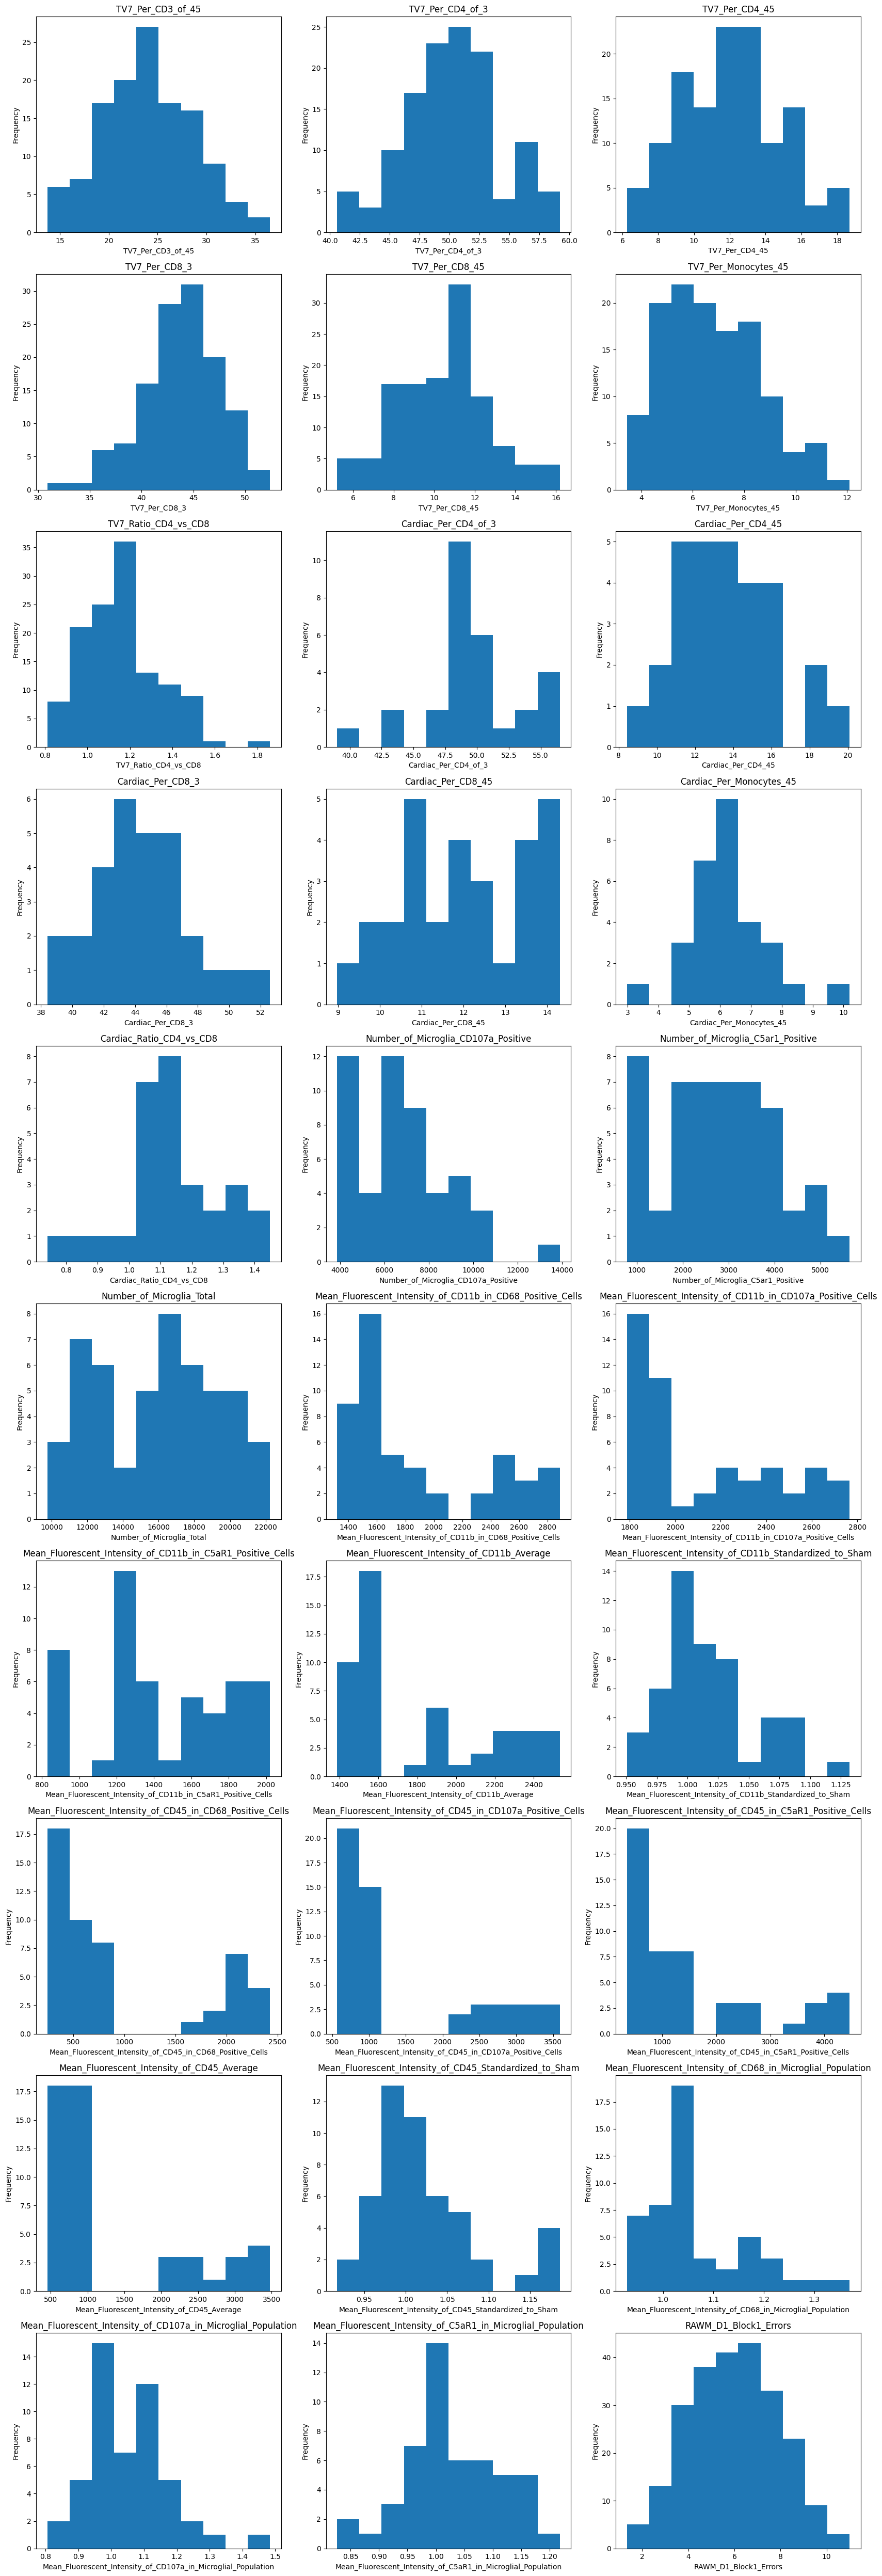

In [21]:
m.visualize_numerical_features(merged_df_1)

In [22]:
# find the threshold for the ML classification model
threshold = merged_df_1['RAWM_D1_Block1_Errors'].quantile(0.75)
print(threshold)

7.333333333


In [23]:
# Create the new column 'RAWM_D1_Block1_Errors_Conversion'
merged_df_1['RAWM_D1_Block1_Errors_Conversion'] = ''

# Loop through 'RAWM_D1_Block1_Errors' and populate 'RAWM_D1_Block1_Errors_Conversion'
for index, row in merged_df_1.iterrows():
    if row['RAWM_D1_Block1_Errors'] >= 7:
        merged_df_1.loc[index, 'RAWM_D1_Block1_Errors_Conversion'] = "pos"
    else:
        merged_df_1.loc[index, 'RAWM_D1_Block1_Errors_Conversion'] = "neg"

Class Counts:
 RAWM_D1_Block1_Errors_Conversion
neg    154
pos     84
Name: count, dtype: int64

Class Distribution:
 RAWM_D1_Block1_Errors_Conversion
neg    0.647059
pos    0.352941
Name: count, dtype: float64


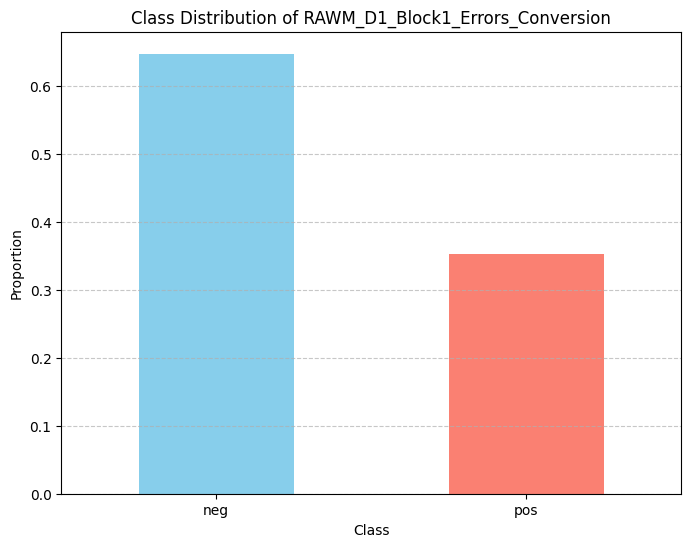

Class Counts:
 Factor Value[Ionizing Radiation]
mixed radiation field    140
non-irradiated            98
Name: count, dtype: int64

Class Distribution:
 Factor Value[Ionizing Radiation]
mixed radiation field    0.588235
non-irradiated           0.411765
Name: count, dtype: float64


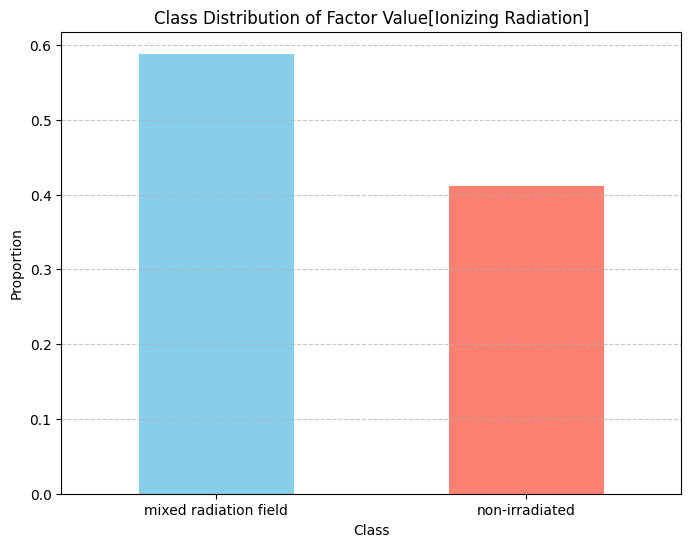

Class Counts:
 Factor Value[Sex]
Male      151
Female     87
Name: count, dtype: int64

Class Distribution:
 Factor Value[Sex]
Male      0.634454
Female    0.365546
Name: count, dtype: float64


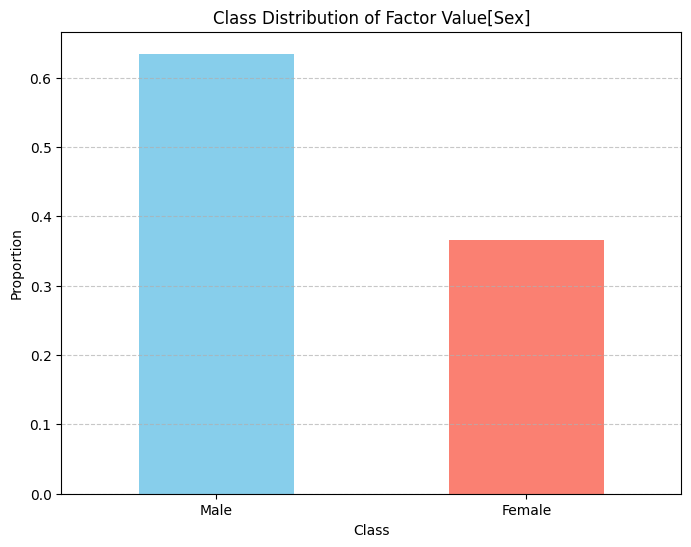

Class Counts:
 Factor Value[Treatment]
Normal Chow                         173
Microglia Depletion Chow PLX5622     65
Name: count, dtype: int64

Class Distribution:
 Factor Value[Treatment]
Normal Chow                         0.726891
Microglia Depletion Chow PLX5622    0.273109
Name: count, dtype: float64


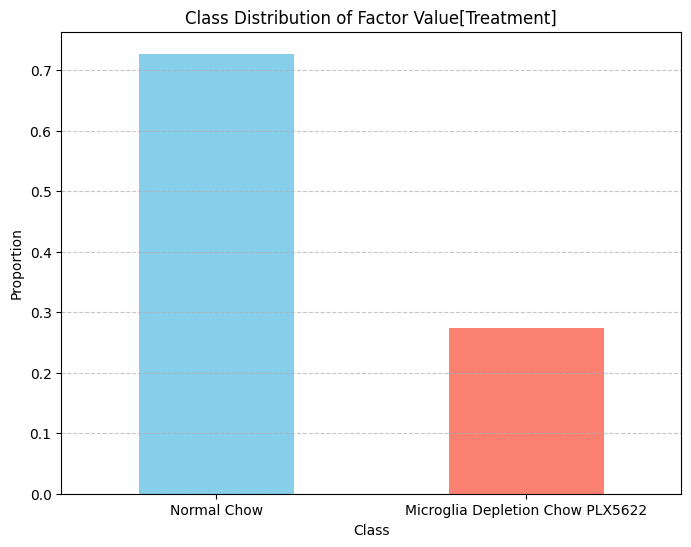

In [24]:
m.visualize_target_distribution(merged_df_1, 'RAWM_D1_Block1_Errors_Conversion')
m.visualize_target_distribution(merged_df_1, 'Factor Value[Ionizing Radiation]')
m.visualize_target_distribution(merged_df_1, 'Factor Value[Sex]')
m.visualize_target_distribution(merged_df_1, 'Factor Value[Treatment]')

# Building ML models

In [25]:
merged_df_1 = merged_df_1.drop(columns=['RAWM_D1_Block1_Errors'])
print('dataframe shape:', merged_df_1.shape)
merged_df_1.head(3)

dataframe shape: (238, 34)


,Source Name,Factor Value[Sex],Factor Value[Treatment],Factor Value[Ionizing Radiation],TV7_Per_CD3_of_45,TV7_Per_CD4_of_3,TV7_Per_CD4_45,TV7_Per_CD8_3,TV7_Per_CD8_45,TV7_Per_Monocytes_45,...,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population,RAWM_D1_Block1_Errors_Conversion
0,1,Female,Normal Chow,non-irradiated,25.8,46.9,12.1,46.0,11.90,10.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neg
1,2,Female,Normal Chow,non-irradiated,21.4,50.2,10.8,43.0,9.21,7.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pos
5,3,Female,Normal Chow,mixed radiation field,32.7,45.9,15.0,47.7,15.60,7.32,...,1.005384,455.0,859.0,1358.0,890.666667,0.952245,1.035252,1.000166,0.993079,neg


In [26]:
# Drop the target column 'RAWM_D1_Block1_Errors_Conversion'
x = merged_df_1.drop(columns=['RAWM_D1_Block1_Errors_Conversion'])
y = merged_df_1['RAWM_D1_Block1_Errors_Conversion']

In [27]:
#Split the dataframe to train and test sets
X_train_prepared_df, X_test_prepared_df, Y_train, Y_test = m.prepare_data_for_ml(x, y)

In [28]:
# To train and evaluate all models:
models = m.train_and_evaluate_models(X_train_prepared_df, X_test_prepared_df, Y_train, Y_test)

LogisticRegression()               precision    recall  f1-score   support

         neg       0.64      0.86      0.74        29
         pos       0.56      0.26      0.36        19

    accuracy                           0.62        48
   macro avg       0.60      0.56      0.55        48
weighted avg       0.61      0.62      0.59        48

KNeighborsClassifier()               precision    recall  f1-score   support

         neg       0.69      0.83      0.75        29
         pos       0.62      0.42      0.50        19

    accuracy                           0.67        48
   macro avg       0.65      0.62      0.62        48
weighted avg       0.66      0.67      0.65        48

SVC(probability=True)               precision    recall  f1-score   support

         neg       0.65      0.69      0.67        29
         pos       0.47      0.42      0.44        19

    accuracy                           0.58        48
   macro avg       0.56      0.56      0.56        48
weighted

In [29]:
#fine-tuning the best model
best_model = m.best_knn_model = m.find_best_knn_model(X_train_prepared_df, Y_train)

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.6473684210526315


In [30]:
# Transform the test set using the fitted full_pipeline
final_predictions = best_model.predict(X_test_prepared_df)
print(final_predictions)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test_prepared_df, Y_test)
print(f"Test set accuracy: {test_accuracy}")

['neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos'
 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg'
 'neg' 'pos' 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos'
 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg']
Test set accuracy: 0.6458333333333334


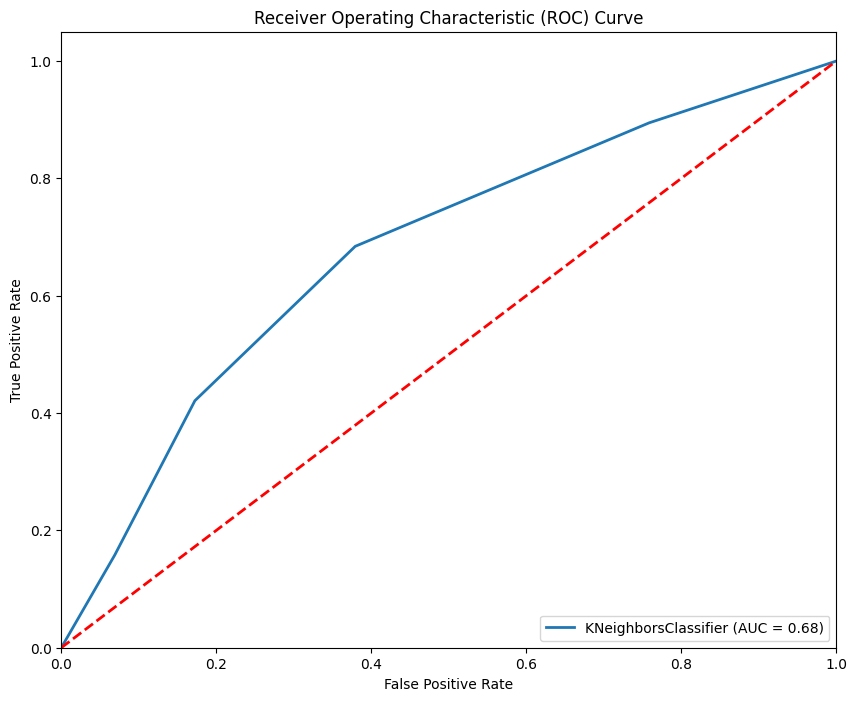

In [31]:
# ROC curve analysis
m.plot_roc_curve(models['KNeighborsClassifier'], X_test_prepared_df, Y_test)

Confusion Matrix:
 [[24  5]
 [12  7]]


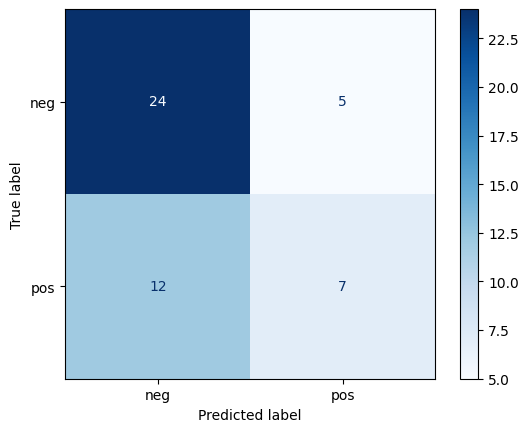

In [32]:
#confustion matrix
m.generate_and_display_confusion_matrix(Y_test, final_predictions)